# XAI techniques for Decision Tree
### - InModeling XAI
### - PostHoc XAI

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import shap

In [78]:
data = pd.read_csv("wnba_clean.csv")

### Selecting only the necessary attributes for model training

In [79]:
selected_features = ['coordinate_x', 'coordinate_y', 'distance', 'shot_group_encoded', 'shot_type_encoded']

In [80]:
X = data[selected_features]
y = data['made_shot']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Decision Tree
For easier visualization and explanainability we will use low depth

In [82]:
# Initialize and train Decision Tree
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  
dt_model.fit(X_train, y_train)

# Model evaluation
y_pred = dt_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6670682730923695

Classification Report:
               precision    recall  f1-score   support

       False       0.63      0.75      0.69      6030
        True       0.71      0.59      0.65      6420

    accuracy                           0.67     12450
   macro avg       0.67      0.67      0.67     12450
weighted avg       0.67      0.67      0.67     12450



### InModeling XAI

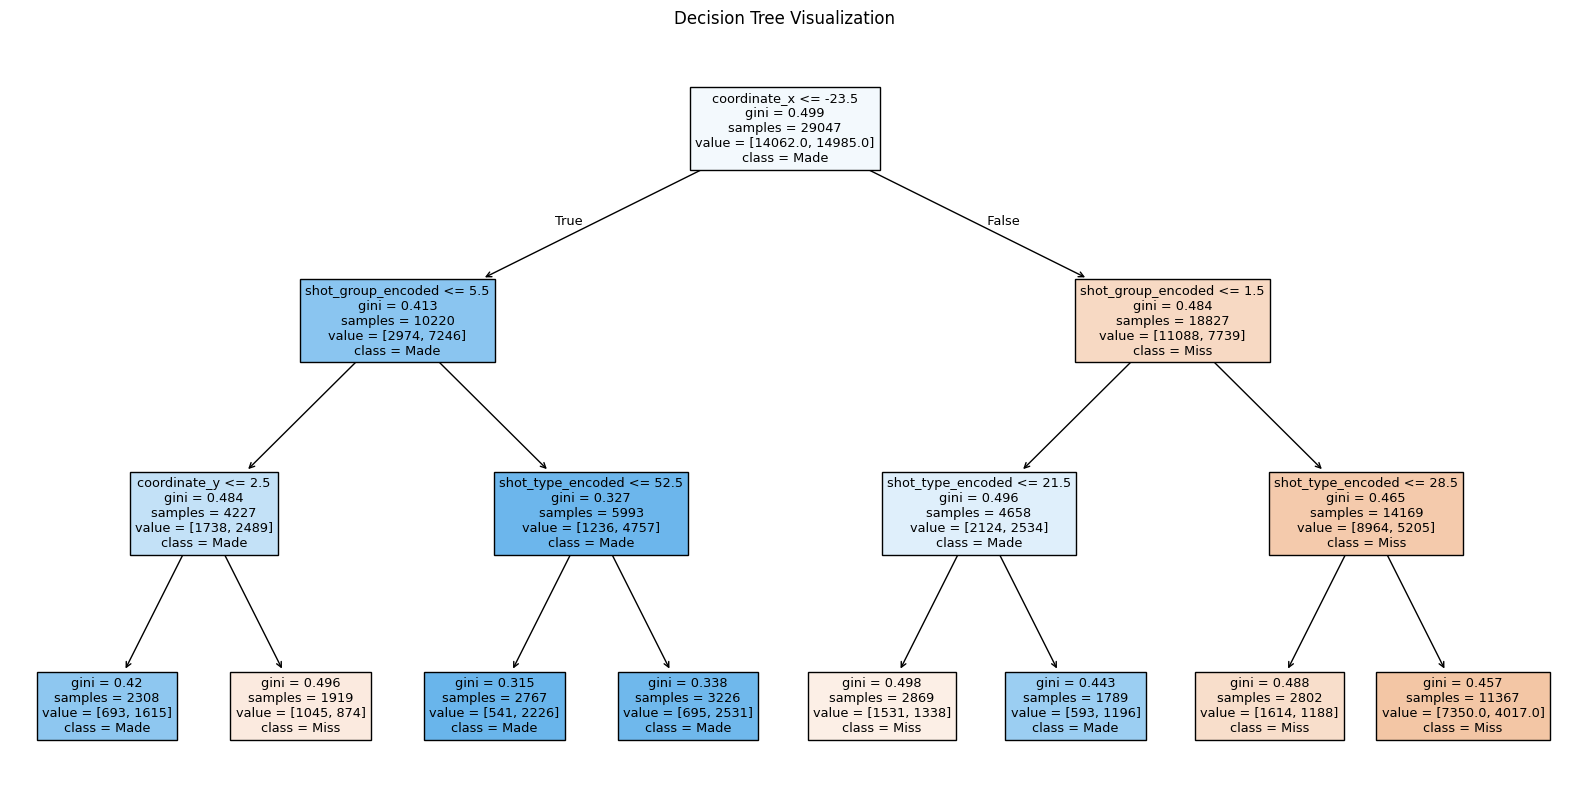

In [63]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['Miss', 'Made'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

This visualization allows the viewer to understand each and every decision made by the model to get to its predictions.
It is a great way to explain the process that the Decision Tree went through to achieve the results.

### Post Hoc XAI

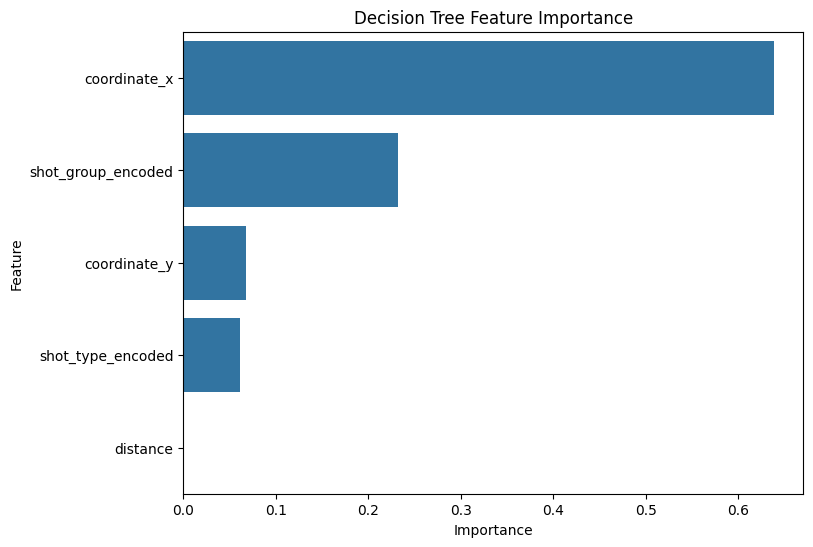

In [64]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Decision Tree Feature Importance')
plt.show()


Because a Decision Tree chooses a feature to expand at each node, it is normal to have such a big disparity between importances in a low depth tree, as some feature might not even be used (the case for distance).

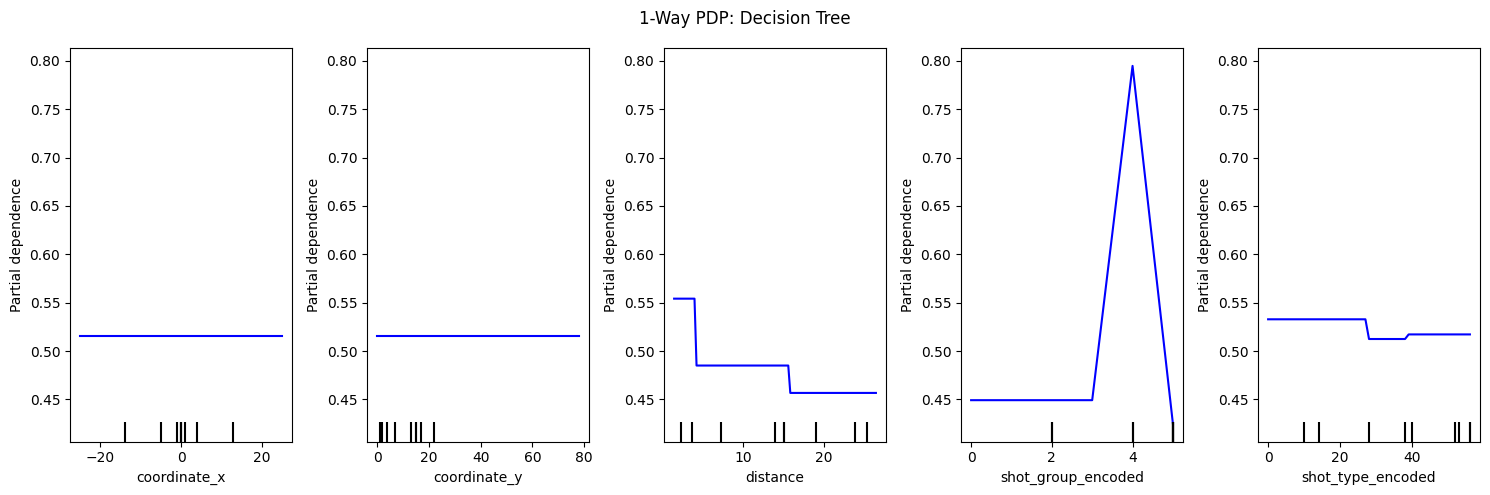

In [83]:

# 1-way PDP for both models (individual features)
features = [0, 1, 2, 3, 4]  # Adjust these to your features' indices
fig, axs = plt.subplots(1, len(features), figsize=(15, 5))
PartialDependenceDisplay.from_estimator(dt_model, X_train, features, ax=axs, line_kw={"color": "blue"})
plt.suptitle("1-Way PDP: Decision Tree")
plt.tight_layout()
plt.show()


PDPs are usually a good choice to understand the models predictions, but it wasn't that helpful for this model, the only interesting insight we can take from these plots are that some features reach higher points of Partial Dependence and then "fall", meaning that the predictions are differently influenced by this feature as its values change as well. 

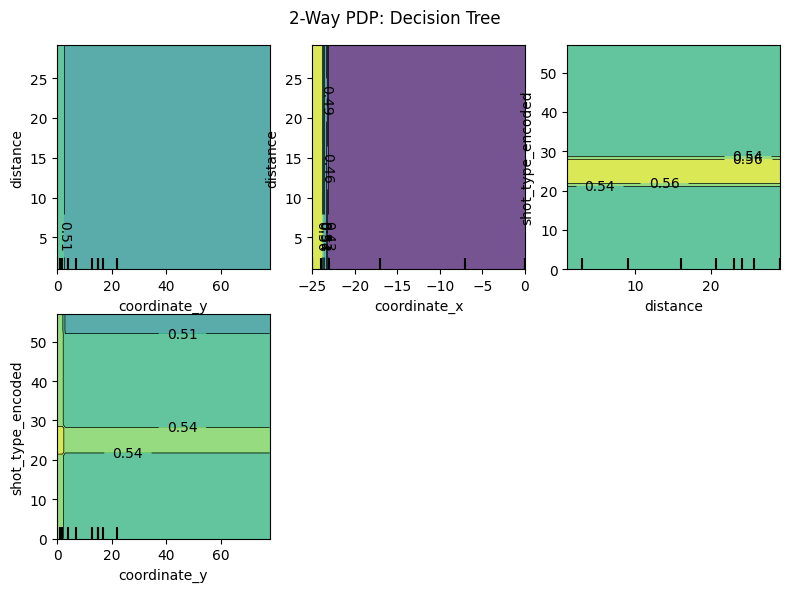

In [65]:
# 2-way PDP for feature interactions
interaction_features = [(1, 2), (0,2), (2,4), (1,4)]  
# For Linear Regression
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(dt_model, X_train, interaction_features, ax=ax)
plt.suptitle("2-Way PDP: Decision Tree")
plt.tight_layout()
plt.show()

And 2 way PDPs serve as a tool to understand how the interaction of two features change in prediction influence along with their values, but this technique isn't as useful for a low depth decision tree like this one.